In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# вместо первых двух номеров я скинул обработку данных с лабораторных работ 1.1.1 и 1.1.4

In [ ]:
# 3

In [32]:
df = pd.read_csv('iris_data.csv')
df
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
flow = {}
for i in df["Species"]:
    if i in flow:
        flow[i] += 1
    else:
        flow[i] = 1

le = {"<1.2": 0, ">1.2<1.5": 0, ">1.5": 0}
for i in df["PetalLengthCm"]:
    if float(i) < 1.2:
        le["<1.2"] += 1
    elif float(i) > 1.5:
        le[">1.5"] += 1
    elif 1.5 >= float(i) >= 1.2:
        le[">1.2<1.5"] += 1


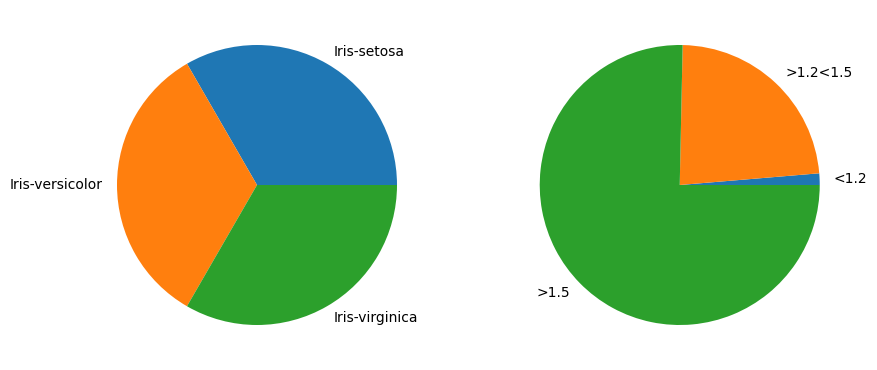

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(211)
plt.pie(list(flow.values()), labels = list(flow.keys()))

plt.subplot(222)
plt.pie(list(le.values()), labels = list(le.keys()))


plt.show()

In [ ]:
# 4

In [43]:
def least_squares(x, y):
    k = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x*x) - np.mean(x) ** 2)
    b = np.mean(y) - k * np.mean(x)
    return k, b

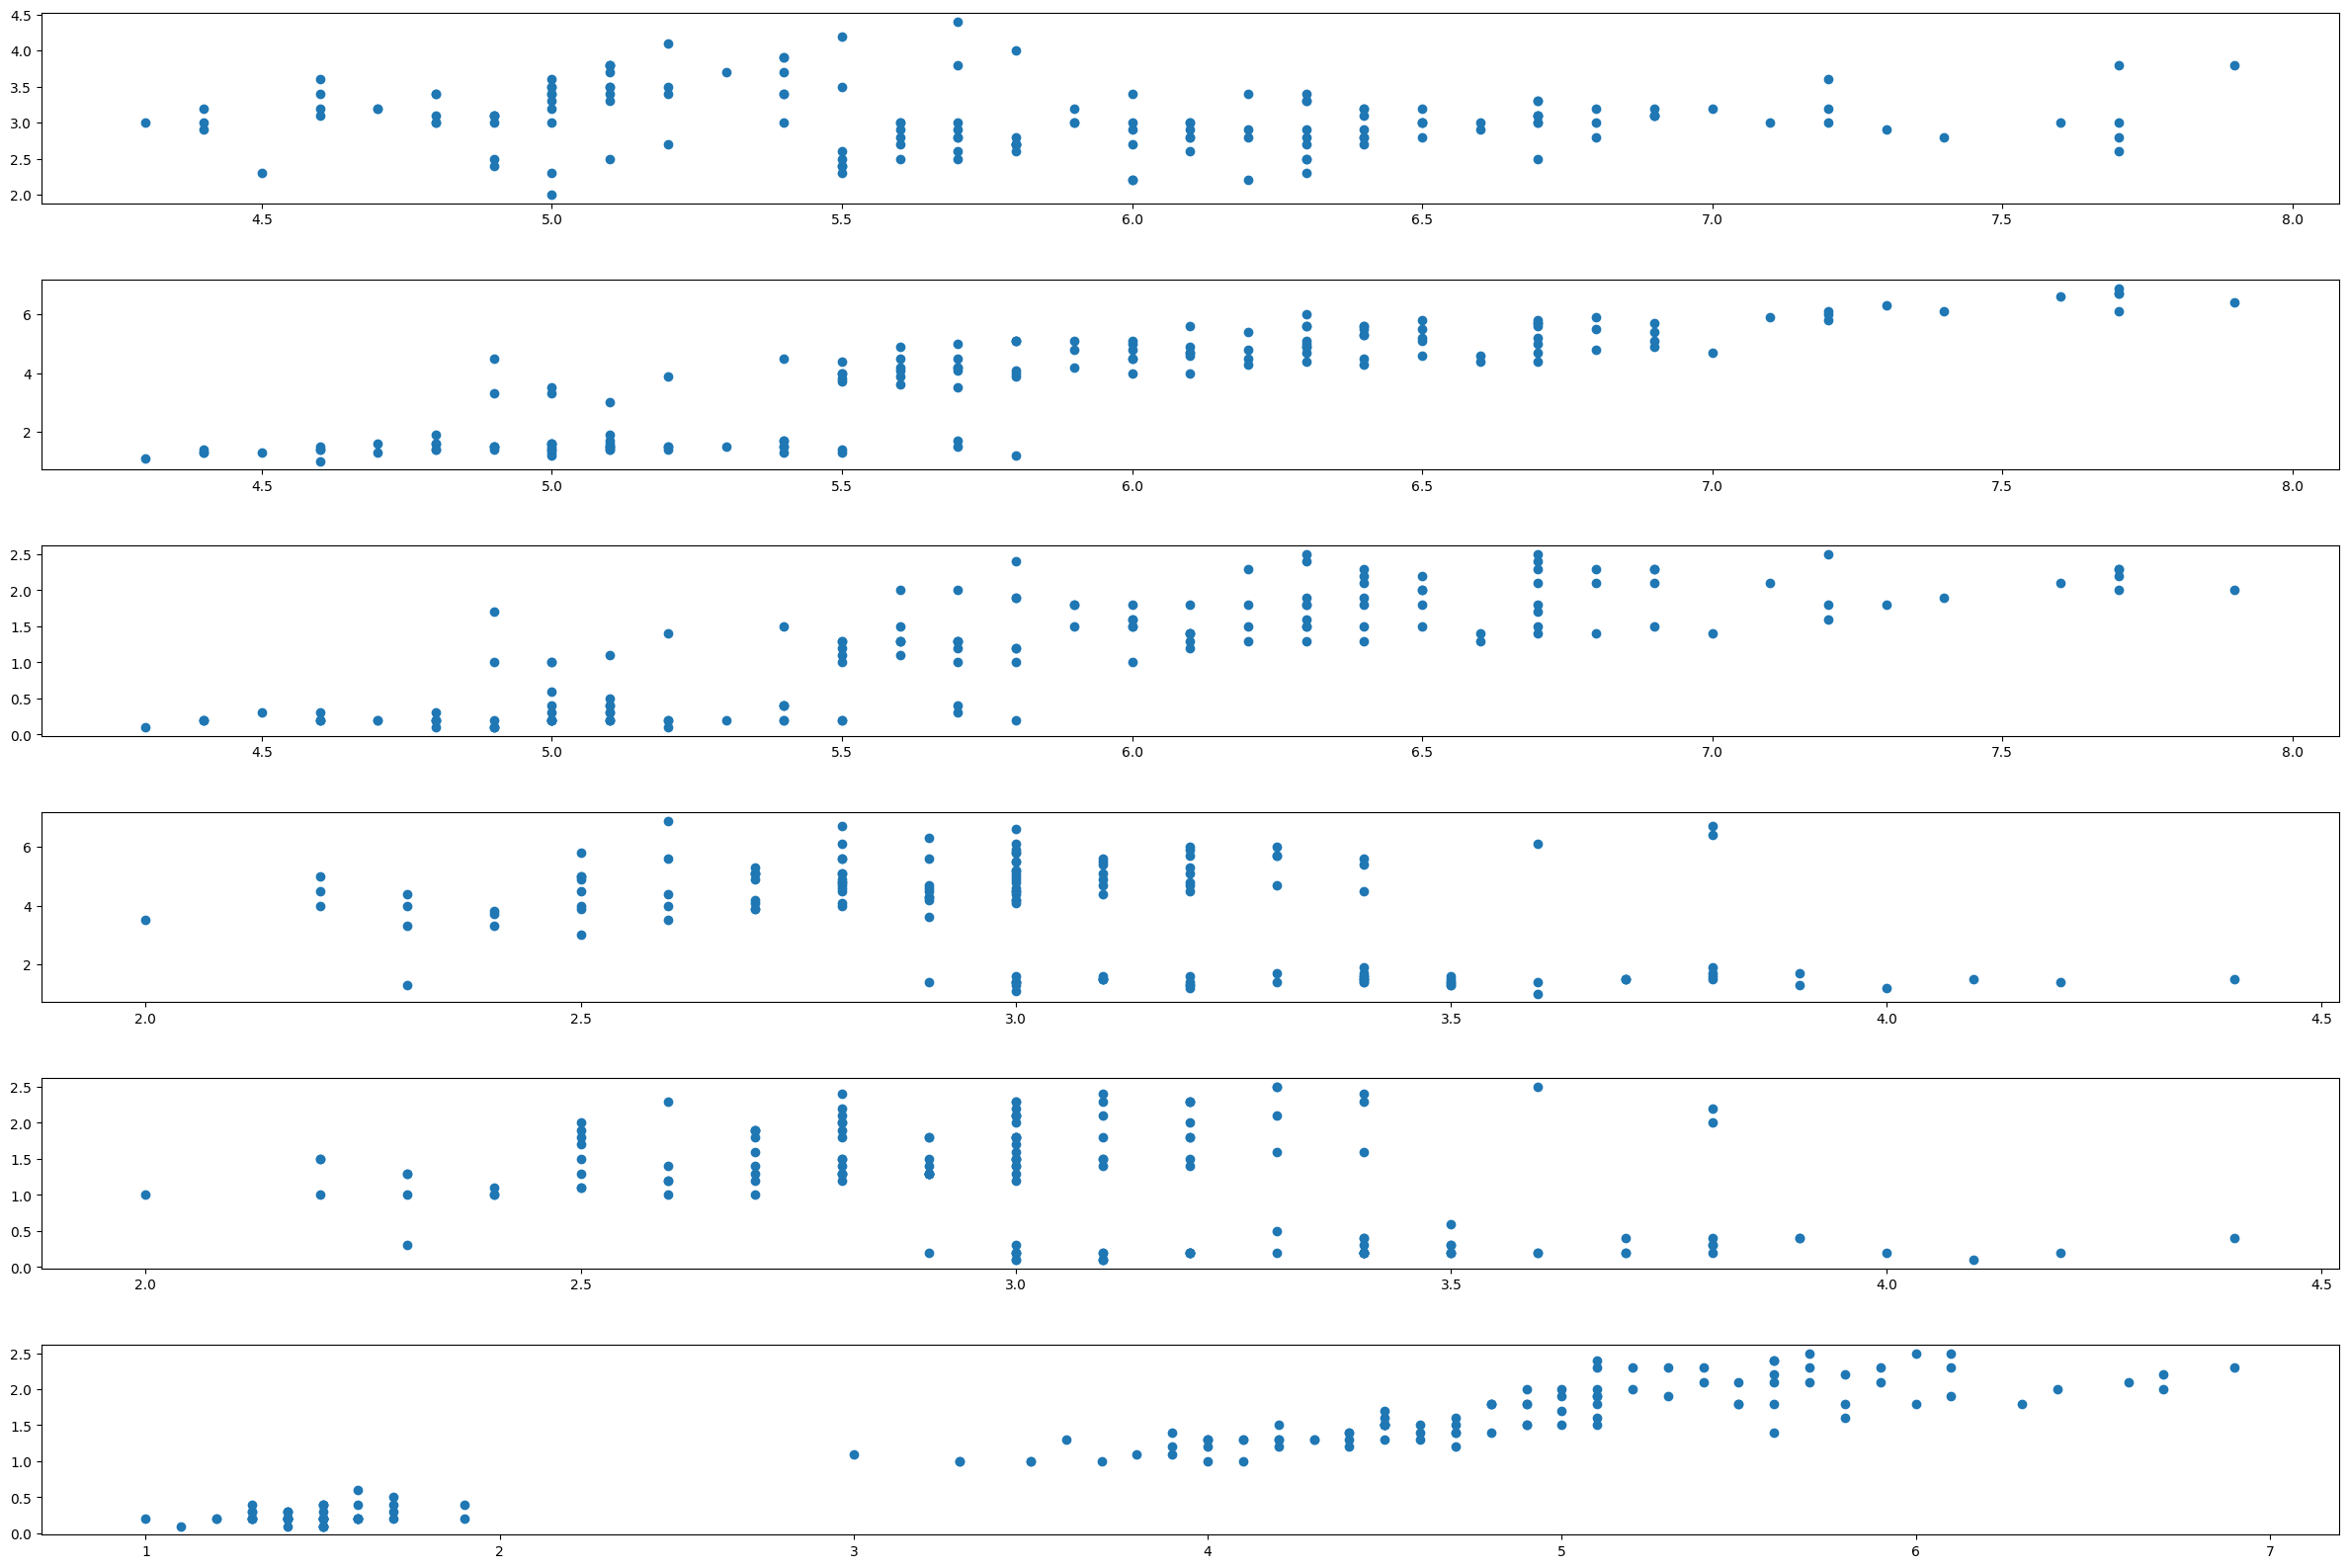

In [42]:
plt.figure(figsize=(30,20)).subplots_adjust(hspace=0.4)

plt.subplot(611)
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])

plt.subplot(612)
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"])

plt.subplot(613)
plt.scatter(df["SepalLengthCm"], df["PetalWidthCm"])

plt.subplot(614)
plt.scatter(df["SepalWidthCm"], df["PetalLengthCm"])

plt.subplot(615)
plt.scatter(df["SepalWidthCm"], df["PetalWidthCm"])

plt.subplot(616)
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])

plt.show()

0.41641913228540106 -0.36651404521672704


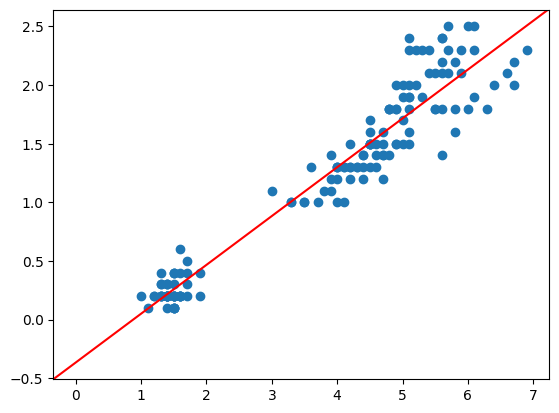

In [45]:
k, b = least_squares(df["PetalLengthCm"], df["PetalWidthCm"])
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.axline((0, b), slope=k, color='r')
print(k, b)
plt.show()

In [46]:
# 5

In [48]:
btc = pd.read_csv('BTC_data.csv')
btc

,time,open,high,low,close
0,2017-12-18T02:00:00+03:00,20650,20650,18345,19100
1,2017-12-19T02:00:00+03:00,19135,19725,17180,18200
2,2017-12-20T02:00:00+03:00,17745,18350,16435,17040
3,2017-12-21T02:00:00+03:00,16400,17270,15080,15330
4,2017-12-22T02:00:00+03:00,15595,15825,12265,14135
...,...,...,...,...,...
1452,2023-09-25T01:00:00+03:00,26545,26545,25985,26355
1453,2023-09-26T01:00:00+03:00,26300,26430,26090,26245
1454,2023-09-27T01:00:00+03:00,26150,26890,26080,26250
1455,2023-09-28T01:00:00+03:00,26400,27590,26400,27355


In [58]:
t = []
for i in btc['time']:
    t.append('{dd}-{mm}-{yyyy}'.format(dd=i[8:10], mm=i[5:7], yyyy=i[0:4]))

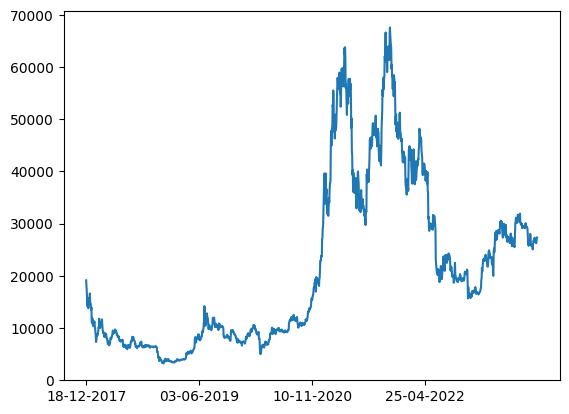

In [64]:
plt.plot(t, btc["close"])
plt.xticks(t[::365])

plt.show()

In [ ]:
# 6

In [81]:
x_val = np.array(list(map(float, range(len(btc['close'])))))
y_val = np.array(list(btc['close']))
z = np.polyfit(x_val, y_val, 40)
p = np.poly1d(z)

C:\Users\kiril\AppData\Local\Temp\ipykernel_14744\198323611.py:3: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x_val, y_val, 40)


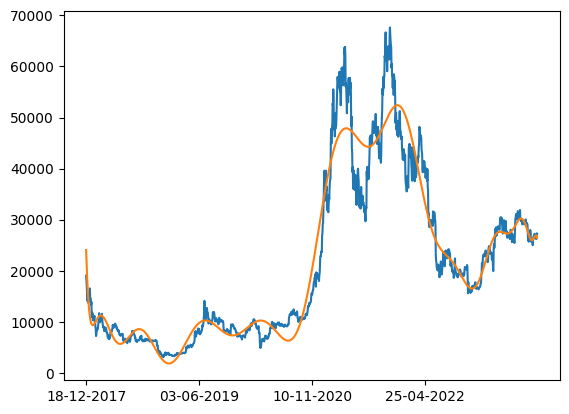

In [84]:
plt.plot(t, btc["close"])
plt.xticks(t[::365])
y_val2 = p(x_val)
plt.plot(y_val2)

plt.show()

In [106]:
# 7

True


In [114]:
import string


with open('license.txt') as f:
    s = f.read()
    for i in string.punctuation:
        s = s.replace(i, ' ')
    s = s.lower().split()


a = dict()
for elem in s:
    if not a.get(elem):
        a[elem] = 1
    else:
        a[elem] += 1

e = []
top_val = sorted(a.values(), reverse=True)[:10]
for slovo in a:
    if a.get(slovo) in top_val:
        e.append((slovo, a.get(slovo)))
        top_val.remove(a.get(slovo))

e = sorted(e, key=lambda x: x[1], reverse=True)
for vivod in e:
    print(f'{vivod[0]} : {vivod[1]}')

or : 23
of : 13
python : 12
and : 12
to : 12
any : 12
psf : 10
licensee : 10
the : 9
license : 8


In [ ]:
# 8

In [88]:
a = [1, 1, 2, 5, 6, 7, 7]
b = [3, 5, 4, 8, 9, 5, 2]
print(*set(a))
print(*set(b))
print(*set(a).union(set(b)))

1 2 5 6 7
2 3 4 5 8 9
1 2 3 4 5 6 7 8 9
